# Continued Fractions

### Introduction

The are two types of continued fractions:

<ul>
    <li>Finite Continued Fractions</li>
    <div>
        \begin{equation*}
            a_0 + {\frac{b_1}{a_1 + \frac{b_2}{a_2 + \frac{b_3}{\ddots + \frac{b_n}{a_n}}}}}
        \end{equation*}
    </div>
    <li>Infinite Continue Fractions</li>
    <div>
        \begin{equation*}
            a_0 + {\frac{b_1}{a_1 + \frac{b_2}{a_2 + \frac{b_3}{a_3 + \ddots}}}}
        \end{equation*}
    </div>
    <span>Where $a_i$, $b_i$ are integers $\forall i$ and $n \geq 1$</span>
</ul>

### Simple Continued Fractions

A continued fraction is called <b>simple</b> if it satisfy these conditions:
<ul>
    <li>It is finite or infinite</li>
    <li>$a_0$ is an integer</li>
    <li>$a_i$ is a positive integer $\forall i > 0$</li>
    <li>$b_i$ is 1</li>
</ul>

Simple continued fractions are usually denoted as

\begin{equation*}
    \big[a_0; a_1, a_2, ... \big]
\end{equation*}

#### Example 1

This is the simple continued fraction form of $\frac{11}{4}$

\begin{equation*}
    2 + \frac{1}{1 + \frac{1}{3}}
\end{equation*}

or $\big[2; 1, 3\big]$

This is the simple continued fraction form of $\pi$

\begin{equation*}
    3 + \frac{1}{7 + \frac{1}{15 + \frac{1}{1 + \ddots}}}
\end{equation*}

or $\big[3; 7, 15, 1, ... \big]$

### Periodic Continued Fractions

A continued fraction is <b>periodic</b> if it repeats the pattern every $h$ length. Formally,

\begin{equation*}
    a_n = a_{n+h}
\end{equation*}

for some fixed positive integer $h$.

#### Example 2

This is a periodic continued fraction with length of 2 in the form $\big[2; 5, 3, 5, 3, ...\big]$

\begin{equation*}
    2 + \frac{1}{5 + \frac{1}{3 + \frac{1}{5 + \frac{1}{3 + \ddots}}}}
\end{equation*}

Alternatively, we could write this fraction as $\big[2; \overline{5, 3}\big]$

### Properties

These are some useful properties of continued fraction:
<ul>
    <li>Rational numbers, i.e. $x \in Q$, can always be written as finite continued fractions (but not infinite). The converse is also true.</li>
    <li>If $r$ is a solution to quadratic polynomial with integer coefficients, then the expansion of $r$ can be written as a periodic continued fractions. The converse is also true.</li>
    <li>$\left[a_0, a_1, a_2, ..., a_n\right] = \left[a_0, [a_1, a_2, ..., a_n]\right]$</li>
    <li>$\left[a_0, a_1, a_2, ..., a_n\right] = \left[a_0, a_1, a_2, ..., a_{n-1} + \frac{1}{a_n}\right]$</li>
</ul>

### Rational Number to Simple Continued Fraction

We can use [Euclidean Algorithm](https://brilliant.org/wiki/euclidean-algorithm/) to convert any rational numbers, $\frac{p}{q}$, to a simple continued fractions. These steps will help summarize the algorithm:

<ul>
    <li>If $p \geq q$, then $a_i = \left\lfloor\frac{p}{q}\right\rfloor$</li>
    <li>If $p < q$, then write $\frac{p}{q}$ as $\frac{1}{\left(\frac{q}{p}\right)}$</li>
    <li>If $p = 1$, terminate algorithm</li>
</ul>

#### Example 3

Write $\frac{48}{7}$ as simple continued fraction

\begin{align}
    \frac{48}{7} &= 6 + \frac{6}{7}\\
    &= 6 + \frac{1}{\frac{7}{6}}\\
    &= 6 + \frac{1}{1 + \frac{1}{6}}
\end{align}

or $\left[6; 1, 6\right]$

In [2]:
# Complexity: O(log(p + q)) by euclidean algorithm
def fromQ(p, q):
    res = [p // q] + iterate_fromQ(p % q, q);
    return res;

def iterate_fromQ(p, q):
    res = [];
    if(p == 1): return [q];
    
    if(p >= q): res += [p // q] + fromQ(p%q, q);
    else: res += fromQ(q, p);
    
    return res;

cf1 = fromQ(48, 7);
cf2 = continued_fraction(48 / 7); # Sagemath's build-in function
print(cf1);
print(cf2);

[6, 1, 6]
[6; 1, 6]


In [2]:
# Complexity: O(|a|)
def toQ(a):
    a = [(x, 1) for x in a];
    return iterate_toQ(a);

def iterate_toQ(a):
    if(len(a) == 1): return a[0];
    a[-2] = (a[-2][0] * a[-1][0] + a[-1][1], a[-1][0]);
    return iterate_toQ(a[:-1]);
    
f1 = toQ([6, 1, 6]);
f2 = continued_fraction([6, 1, 6]).convergents()[-1];
print(f1);
print(f2);

(48, 7)
48/7


### Irrational Number to Simple Continued Fraction

The algorithm used to convert irrational numbers to simple continued fraction is different by a little. The idea is to truncate the decimal representation of the number to a certain length, then do the same algorithm as before.

#### Example 4

Express $\pi$ as a simple continued fraction!

We know that $\pi \approx 3.1415926535$

\begin{align}
    \pi &= 3 + 0.1415926535\\
    &= 3 + \frac{1}{\frac{1}{0.1415926535}}\\
    &= 3 + \frac{1}{7 + 0.0625133104}\\
    &= 3 + \frac{1}{7 + \frac{1}{\frac{1}{0.0625133104}}}\\
    &= 3 + \frac{1}{7 + \frac{1}{15 + 0.9965932631}}\\
\end{align}

This process continues for a long time and will stop after certain iterations. Note that the result we get matches with the one on example 1.

In [3]:
# Complexity: O(depth)
def fromR(q, depth = 10):
    res = [floor(q)] + iterate_fromR(q - floor(q), depth, 1);
    return res;

def iterate_fromR(q, max_depth, curr_depth):
    if(curr_depth == max_depth): return [];
    if(q == 1): return [1];
    
    if(q > 1): return [floor(q)] + iterate_fromR(q - floor(q), max_depth, curr_depth + 1);
    else: return iterate_fromR(1 / q, max_depth, curr_depth);
    
cf1 = fromR(pi, 10);
cf2 = continued_fraction(pi);
print(cf1);
print(cf2);

[3, 7, 15, 1, 292, 1, 1, 1, 2, 1]
[3; 7, 15, 1, 292, 1, 1, 1, 2, 1, 3, 1, 14, 2, 1, 1, 2, 2, 2, 2, ...]


### Irrational Numbers can be Periodic Continued Fraction

Write $\sqrt{5}$ as continued fraction!

\begin{align}
    \sqrt{5} &= 2 + (\sqrt{5} - 2)\\
    &= 2 + \frac{1}{\frac{1}{\sqrt{5}-2}}\\
    &= 2 + \frac{1}{2 + \sqrt{5}}
\end{align}

Substitute the expansion of $\sqrt{5}$ to itself:

\begin{align}
    \sqrt{5} &= 2 + \frac{1}{2 + 2 + \frac{1}{2 + \sqrt{5}}}\\
    &= 2 + \frac{1}{4 + \frac{1}{2 + 2 + \frac{1}{2 + \sqrt{5}}}}\\
    &= 2 + \frac{1}{4 + \frac{1}{4 + \ddots}}
\end{align}

The expansion of $\sqrt{5}$ can be written as $\left[2; 4, 4, 4, 4, ...\right]$. Since $5$ is a root of the quadratic polynomial $x^2 - 5 = 0$, we can be sure that the expansion will be periodic.

### Solving Periodic Continued Fraction

Suppose we have a periodic fraction defined as:

\begin{equation*}
    \left[a_0, a_1, ..., a_k, \overline{R}\right]
\end{equation*}

Where $R$ is the reccuring part of the continued fraction.

Let:

\begin{equation*}
    \overline{R} = \left[b_0, b_1, ..., b_h, b_0, b_1, ..., b_h, ...\right]
\end{equation*}

By property 3, we can write this as:

\begin{align}
    \overline{R} &= [b_0, [b_1, [..., [b_h, [b_0, b_1, ..., b_h, ...]]]]]\\
    &= [b_0, [b_1, [..., [b_h, \overline{R}]]]]
\end{align}

Solve RHS in terms of $\overline{R}$, then solve for the value of $\overline{R}$. Then, substitue the value of $\overline{R}$ to the original problem.

#### Example 5

Find the value of the continued fraction defined as $\left[4; \overline{2, 1, 3, 1, 2, 8}\right]$

Let:

\begin{equation*}
    \overline{R} = \left[\overline{2, 1, 3, 1, 2, 8}\right]
\end{equation*}

so that,

\begin{align}
    \overline{R} &= [2, [1, [3, [1, [2, [8, \overline{R}]]]]]]\\
    &= [2, 1, 3, 1, 2, 8, \overline{R}]\\
    &= 2 + \frac{1}{1 + \frac{1}{3 + \frac{1}{1 + \frac{1}{2 + \frac{1}{8 + \frac{1}{R}}}}}}\\
    &= \frac{326\overline{R} + 39}{117\overline{R} + 14}\\
\end{align}

Solving for $\overline{R}$:

\begin{align}
    0 &= 117\overline{R}^2 - 312\overline{R} - 39\\
    \overline{R} &= \frac{4 \pm \sqrt{19}}{3}
\end{align}

Substitute the value of $\overline{R}$ to the original problem:

\begin{align}
    [4; \overline{2, 1, 3, 1, 2, 8}] &= [4; \overline{R}]\\
    &= 4 + \frac{1}{\frac{4 \pm \sqrt{19}}{3}}\\
\end{align}

Solving the equation will give us the answers $\sqrt{19}$ or $-\sqrt{19}$. However we know that the sum must be positive, so we reject $-\sqrt{19}$.

### Convergence

Suppose the expansion of a number $r$ is 

\begin{equation*}
    r = [a_0, a_1, a_2, ...]
\end{equation*}

We can approximate $r$ by 'cutting' the expansion at the k<sup>th</sup> index so that:

\begin{equation*}
    r = [a_0, a_1, ..., a_k]
\end{equation*}

We call this approximation as the <i>kth-convergence</i> of $r$. This convergence will always be a rational number since the continued fraction is finite, i.e. we can always write the kth-convergence as $\frac{p_k}{q_k}$.

#### Example 6

Given that the expansion of the Golden Ratio, $\Phi = [1; 1, 1, 1, 1, ...]$. Find the 4th-convergence of $\Phi$!

\begin{align}
    \Phi &\approx 1 + \frac{1}{1 + \frac{1}{1 + \frac{1}{1 + \frac{1}{1}}}}\\
    &= \frac{8}{5}
\end{align}

In [4]:
ans_6 = toQ([1, 1, 1, 1, 1]);
print(ans_6);

(8, 5)


The error of the kth-convergence decreases as the value of $k$ increases, in other words:

\begin{equation*}
    lim_{k \to \infty} \left|r - \frac{p_k}{q_k}\right| = 0
\end{equation*}

Eventually, the value of $\frac{p_k}{q_k}$ will converge to $r$. In fact, the graph of the convergence will always look like this:
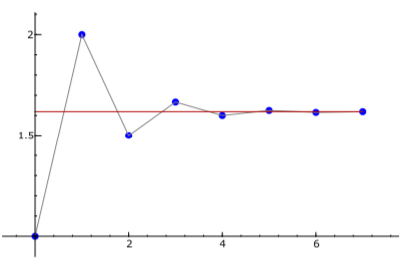

Notice how $\frac{p_k}{q_k}$ and $\frac{p_{k+1}}{q_{k+1}}$ are on the opposite sides of $r$.

### Finding the Kth-Convergence Programmatically

The kth-convergence can be computed by using the following reccursive relation:

\begin{align}
    p_{-1} = 1, p_0 = a_0, p_k = a_k p_{k-1} + p_{k-2}\\
    q_{-1} = 0, q_0 = 1, q_k = a_k q_{k-1} + q_{k-2}\\
\end{align}

This formula has a nice property, which always gives $\frac{p_k}{q_k}$ in the lowest term.

In [5]:
# Complexity: O(k)
def kthConvergence(k, a):
    # Using bottom-up approach
    if(k > len(a) + 1): return None;
    if(k == 0): return (a[0], 1);
    
    p_2 = 1; p_1 = a[0];
    q_2 = 0; q_1 = 1;
    
    for i in range(k):
        p = a[i] * p_1 + p_2;
        q = a[i] * q_1 + q_2;
        
        p_2 = p_1; p_1 = p;
        q_2 = q_1; q_1 = q;
    
    return (p, q);

print(kthConvergence(4, [1, 1, 1, 1, 1]));
print(continued_fraction([1, 1, 1, 1, 1, 1, 1]).convergents()[4]); # Note: This may miscalculate the kth-convergence

(8, 5)
8/5
